## Human Resources Department Prject

Develop a machine learning solution to predict employee attrition based on historical data, aiming to identify factors influencing employees' decisions to leave the company. The objective is to create a robust predictive model that enables proactive measures for employee retention.

In [1]:
DF_PATH = '../data/processed/HR_Processed.pkl'

#### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio

c:\Users\HP\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


#### Read dataset

In [3]:
df = pd.read_pickle(DF_PATH)
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
239,32,Yes,Travel_Rarely,515,Research & Development,1,3,Life Sciences,4,Male,...,3,4,0,4,2,1,3,2,1,2
1259,30,No,Travel_Rarely,305,Research & Development,16,3,Life Sciences,3,Male,...,3,3,1,10,3,3,7,0,1,7
1447,36,No,Non-Travel,301,Sales,15,4,Marketing,4,Male,...,4,1,1,15,4,2,15,12,11,11
1076,54,No,Travel_Frequently,1050,Research & Development,11,4,Medical,2,Female,...,4,1,1,26,2,3,14,9,1,12
990,33,No,Travel_Frequently,1111,Sales,5,1,Life Sciences,2,Male,...,3,1,0,8,2,4,5,4,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

**Questions:**
1. What is overall attrition rate in the company?
2. How does attrition vary by different demographics like age, gender, etc?
3. Are these specific departments or job roles experiencing higher attrition rates?
4. Which factors (e.g.,job satisfaction, work-life balance, distance from home) correlate most strongly with attrition?
5. Are there patterns in the number of years worked or promotions recevied concering attrition?
6. Does higher job involvement or performance ratings relate to longer tenures?
7. Do longer durations with the current manager relate to lower attrition rates?
8. Does the frequence of overtime impact attrition rates?
9. How does the distance of the workplace from an employee's home effect attition?
10. Do higher salary hikes benefits relate to lower attrition?

----------------------------------------

#### 1. What is overall attrition rate in the company?

In [5]:
df_left = df[df['Attrition'] == 'Yes']
df_stayed = df[df['Attrition'] == 'No']

In [6]:
print('Total Employees in The Company: ', len(df))
print('Employees Left: ', len(df_left))
print('Percentage of Employees Left: ', round(len(df_left)/len(df)*100, 2), '%')
print('-----------------------------------------')
print('Employees Stayed: ', len(df_stayed))
print('Percentage of Employees Stayed: ', round(len(df_stayed)/len(df)*100, 2), '%')

Total Employees in The Company:  1470
Employees Left:  237
Percentage of Employees Left:  16.12 %
-----------------------------------------
Employees Stayed:  1233
Percentage of Employees Stayed:  83.88 %


#### 2. How does attrition vary by different demographics like age, gender, etc?

##### Attrition Vs. Age

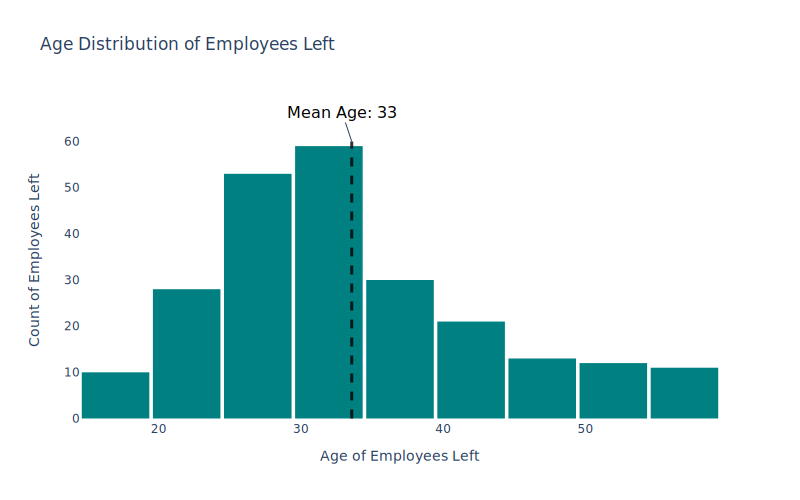

In [7]:
fig = px.histogram(df_left, x='Age', nbins=15,
                   title='Age Distribution of Employees Left',
                   color_discrete_sequence=['#008080'])
fig.update_layout(bargap=0.05, width=800, height=500, plot_bgcolor='#FFFFFF')
mean_age = df_left['Age'].mean()
fig.add_shape(
    dict(
        type='line',
        line=dict(color='black', width=3, dash='dash'),
        x0=mean_age,
        x1=mean_age,
        y0=0,
        y1=60,
        name='Mean Age',
        opacity=0.8
    )
)
fig.add_annotation(
    x = mean_age,
    y = 60,
    text = f'Mean Age: {int(mean_age):.0f}',
    font = dict(size=16, color='#000000')
)
fig.update_xaxes(title='Age of Employees Left', showgrid=False)
fig.update_yaxes(title='Count of Employees Left', showgrid=False)

fig.show(renderer="svg")

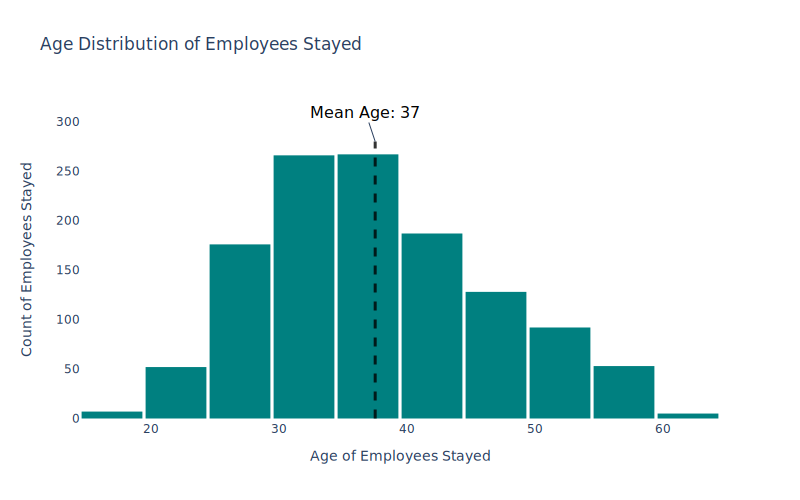

In [8]:
fig = px.histogram(df_stayed, x = 'Age', nbins=15,
                   title='Age Distribution of Employees Stayed',
                   color_discrete_sequence=['#008080'])
fig.update_layout(bargap = 0.05, width = 800, height = 500, plot_bgcolor = '#FFFFFF')
mean_age = df_stayed['Age'].mean()
fig.add_shape(
    dict(
        type = 'line',
        line = dict(color = 'black', width = 3, dash = 'dash'),
        x0 = mean_age,
        x1 = mean_age,
        y0 = 0, 
        y1 = 280,
        name = 'Mean Age',
        opacity = 0.8
    )
)
fig.add_annotation(
    x = mean_age,
    y = 280, 
    text = f'Mean Age: {int(mean_age):.0f}',
    font = dict(size = 16, color = '#000000')
)
fig.update_xaxes(title = 'Age of Employees Stayed', showgrid = False)
fig.update_yaxes(title = 'Count of Employees Stayed', showgrid = False)

fig.show(renderer="svg")

##### Attrition Vs. Gender

In [9]:
fig = px.histogram(df, x = 'Gender', color = 'Attrition', nbins = 15,
                   barmode = 'group', color_discrete_sequence = ['#008080', '#00cccc'])
fig.update_layout(bargap = 0.05, width = 800, height = 500, plot_bgcolor = '#FFFFFF')
fig.update_xaxes(title = 'Gender Of Employees', showgrid = False)
fig.update_yaxes(title = 'Count of Employees', showgrid = False)
fig.show()

#### 3. Are these specific departments or job roles experiencing higher attrition rates?

In [10]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [11]:
job_role_df_left = df_left.groupby('Attrition')['JobRole'].value_counts()\
                .reset_index(name = 'Count')
job_role_df_left

,Attrition,JobRole,Count
0,Yes,Laboratory Technician,62
1,Yes,Sales Executive,57
2,Yes,Research Scientist,47
3,Yes,Sales Representative,33
4,Yes,Human Resources,12
5,Yes,Manufacturing Director,10
6,Yes,Healthcare Representative,9
7,Yes,Manager,5
8,Yes,Research Director,2


In [12]:
job_role_df_stayed = df_stayed.groupby('Attrition')['JobRole'].value_counts()\
                .reset_index(name = 'Count')
job_role_df_stayed

,Attrition,JobRole,Count
0,No,Sales Executive,269
1,No,Research Scientist,245
2,No,Laboratory Technician,197
3,No,Manufacturing Director,135
4,No,Healthcare Representative,122
5,No,Manager,97
6,No,Research Director,78
7,No,Sales Representative,50
8,No,Human Resources,40


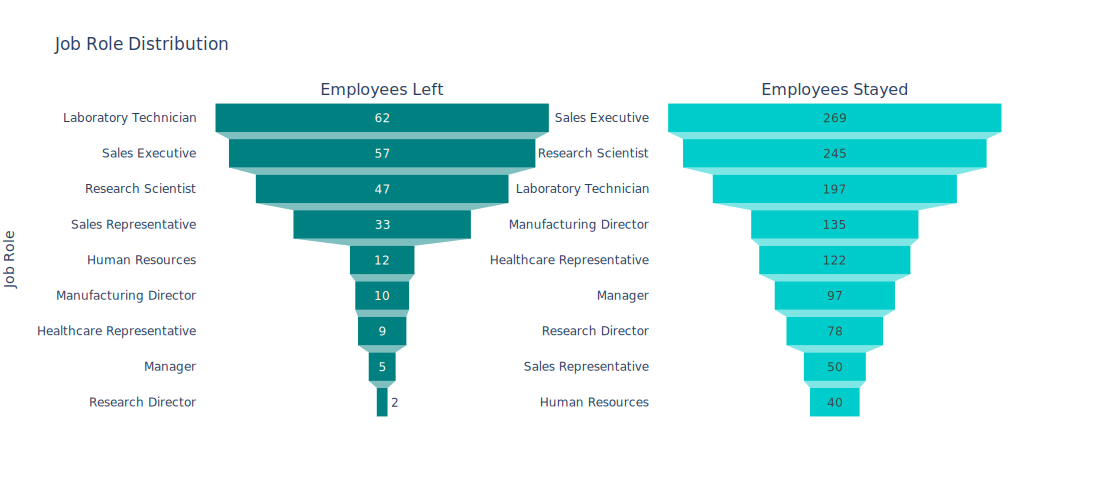

In [13]:
fig = make_subplots(rows = 1, cols = 2,
                    subplot_titles = ['Employees Left', 'Employees Stayed'])
fig.add_trace(
    go.Funnel(
        name = 'Employees Left',
        y = job_role_df_left['JobRole'],
        x = job_role_df_left['Count'],
        textinfo = 'value',
        marker = {"color": "#008080"}
    ),
    row = 1, col = 1
)
fig.add_trace(
    go.Funnel(
        name='Employees Stayed',
        x=job_role_df_stayed['Count'],
        y=job_role_df_stayed['JobRole'],
        textinfo="value",
        marker = {"color": '#00cccc'}
    ),
    row=1, col=2
)
fig.update_layout(
    width=1100,
    height=500,
    plot_bgcolor='#FFFFFF',
    title='Job Role Distribution',
    yaxis_title='Job Role',
    showlegend=False
)

fig.show(renderer="svg")

#### 4. Which factors (e.g.,job satisfaction, work-life balance, distance from home) correlate most strongly with attrition?

In [14]:
# Compute correlation matrix
df_copy = df.copy()
df_copy['Attrition'] = df_copy['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
correlation_matrix = df_copy.corr()
df_corr_mat = pd.DataFrame(correlation_matrix['Attrition'][['JobSatisfaction', 'DistanceFromHome', 'WorkLifeBalance']])
df_corr_mat

C:\Users\HP\AppData\Local\Temp\ipykernel_20132\4088320954.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Attrition
JobSatisfaction,-0.103481
DistanceFromHome,0.077924
WorkLifeBalance,-0.063939


#### 5. Are there patterns in the number of years worked or promotions recevied concering attrition?

In [15]:
fig = px.histogram(df, x = 'YearsSinceLastPromotion', color = 'Attrition', barmode = 'group'
             , color_discrete_sequence = ['#00cccc', '#008080'])
fig.update_layout(bargap = 0.1, width = 800, height = 500, plot_bgcolor = '#FFFFFF')
fig.update_xaxes(title = 'Years Since Last Promotion', showgrid = False)
fig.update_yaxes(title = 'Count of Employees', showgrid = False)
fig.show()

#### 6. Does higher job involvement or performance ratings relate to longer tenures?

In [16]:
fig = px.histogram(df, x = 'JobInvolvement', color = 'Attrition', barmode = 'group', 
                   color_discrete_sequence = ['#00cccc', '#008080'])
fig.update_layout(bargap = 0.05, width = 800, height = 500, plot_bgcolor = '#FFFFFF')
fig.update_xaxes(title = 'Job Involvement', showgrid = False)
fig.update_yaxes(title = 'Count of Employees', showgrid = False)
fig.show()

#### 7. Do longer durations with the current manager relate to lower attrition rates?

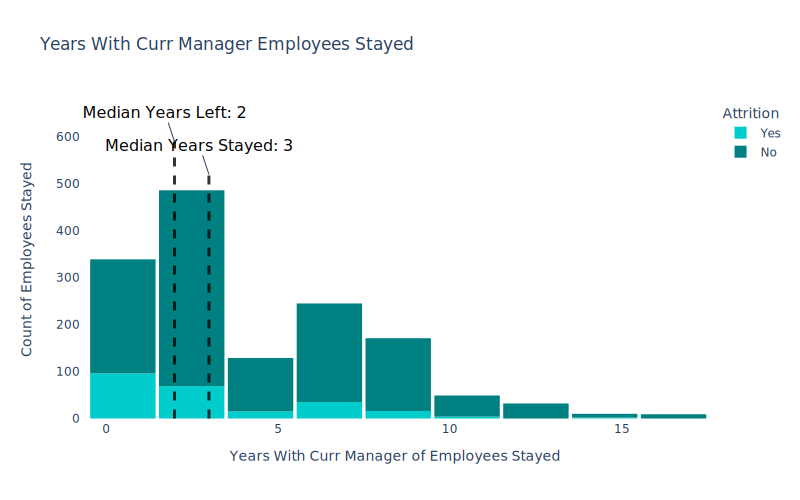

In [17]:
fig = px.histogram(df, x = 'YearsWithCurrManager', nbins=15, color='Attrition',
                   title='Years With Curr Manager Employees Stayed',
                   color_discrete_sequence=['#00cccc' ,'#008080'])
fig.update_layout(bargap = 0.05, width = 800, height = 500, plot_bgcolor = '#FFFFFF')
median_years_stayed = df_stayed['YearsWithCurrManager'].median()
median_years_left = df_left['YearsWithCurrManager'].median()
fig.add_shape(
    dict(
        type = 'line',
        line = dict(color = 'black', width = 3, dash = 'dash'),
        x0 = median_years_stayed,
        x1 = median_years_stayed,
        y0 = 0, 
        y1 = 520,
        name = 'Median Years Stayed',
        opacity = 0.8
    )
)
fig.add_shape(
    dict(
        type = 'line',
        line = dict(color = 'black', width = 3, dash = 'dash'),
        x0 = median_years_left,
        x1 = median_years_left,
        y0 = 0, 
        y1 = 590,
        name = 'Median Years Left',
        opacity = 0.8
    )
)
fig.add_annotation(
    x = median_years_stayed,
    y = 520, 
    text = f'Median Years Stayed: {int(median_years_stayed):.0f}',
    font = dict(size = 16, color = '#000000')
)
fig.add_annotation(
    x = median_years_left,
    y = 590, 
    text = f'Median Years Left: {int(median_years_left):.0f}',
    font = dict(size = 16, color = '#000000')
)
fig.update_xaxes(title = 'Years With Curr Manager of Employees Stayed', showgrid = False)
fig.update_yaxes(title = 'Count of Employees Stayed', showgrid = False)

fig.show(renderer="svg")

#### 8. Does the frequence of overtime impact attrition rates?

In [18]:
df_overtime = df.groupby('Attrition')['OverTime'].value_counts(normalize = True).reset_index(name = 'Percentage')
df_overtime['Percentage'] = np.round(df_overtime['Percentage'] * 100, 2)
df_overtime

,Attrition,OverTime,Percentage
0,No,No,76.56
1,No,Yes,23.44
2,Yes,Yes,53.59
3,Yes,No,46.41


In [19]:
df_overtime.pivot('Attrition', 'OverTime', 'Percentage')

C:\Users\HP\AppData\Local\Temp\ipykernel_20132\3654208011.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



OverTime,No,Yes
Attrition,,
No,76.56,23.44
Yes,46.41,53.59


C:\Users\HP\AppData\Local\Temp\ipykernel_20132\2508910750.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



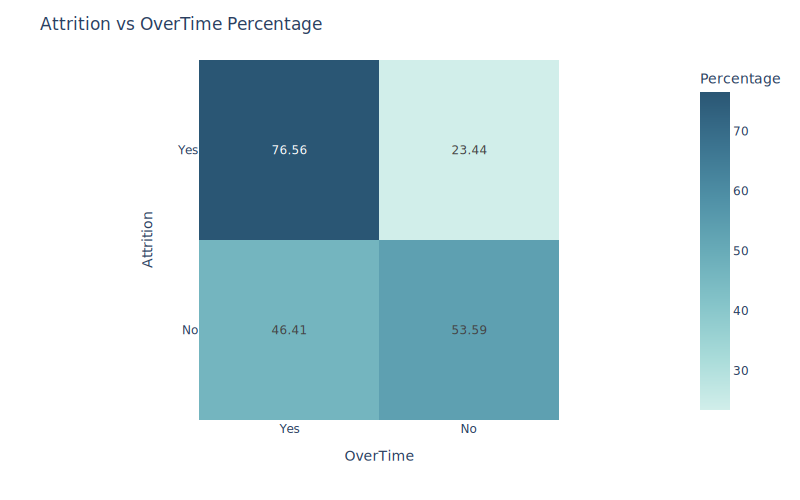

In [20]:
fig = px.imshow(df_overtime.pivot('Attrition', 'OverTime', 'Percentage'),
                labels=dict(x="OverTime", y="Attrition", color="Percentage"),
                x=['Yes', 'No'], y=['Yes', 'No'], color_continuous_scale='teal',
                text_auto=True)
fig.update_layout(title='Attrition vs OverTime Percentage',
                  xaxis_title='OverTime',
                  yaxis_title='Attrition', 
                  width=800, height=500, plot_bgcolor='#FFFFFF')
fig.show(renderer="svg")

#### 9. How does the distance of the workplace from an employee's home effect attition?

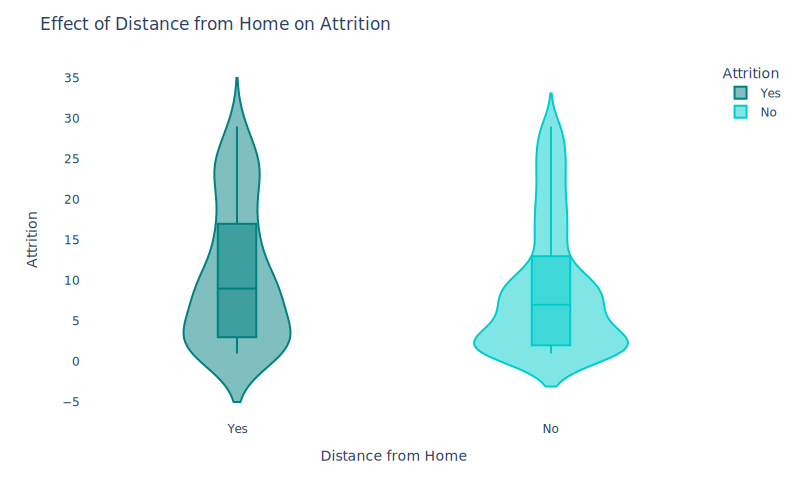

In [21]:
fig = px.violin(df, x='Attrition', y='DistanceFromHome', box=True, color='Attrition',
                color_discrete_sequence=['#008080', '#00cccc'], 
                orientation='v')
fig.update_layout(
    width=800,
    height=500,
    plot_bgcolor='#FFFFFF',
    title='Effect of Distance from Home on Attrition',
    xaxis_title='Distance from Home',
    yaxis_title='Attrition'
)

fig.show(renderer="svg")

#### 10. Do higher salary hikes benefits relate to lower attrition?

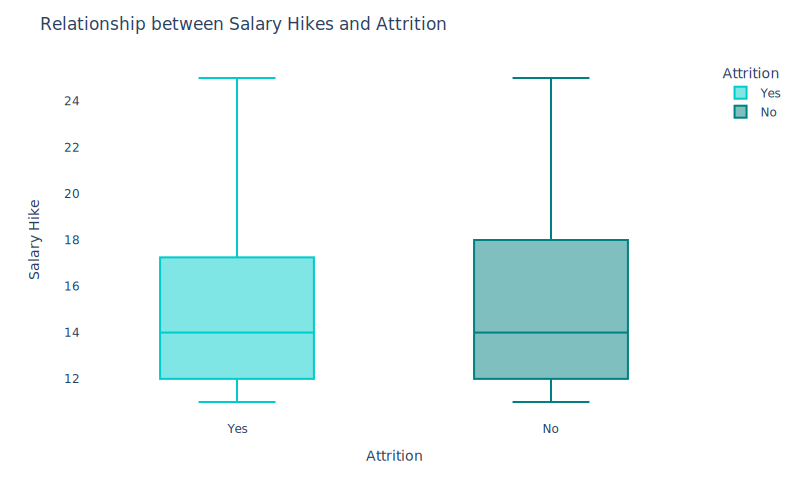

In [22]:
fig = px.box(df, x='Attrition', y='PercentSalaryHike', color='Attrition', 
             color_discrete_sequence=['#00cccc', '#008080'])
fig.update_layout(
    width=800,
    height=500,
    plot_bgcolor='#FFFFFF',
    title='Relationship between Salary Hikes and Attrition',
    xaxis_title='Attrition',
    yaxis_title='Salary Hike'
)

fig.show(renderer="svg")